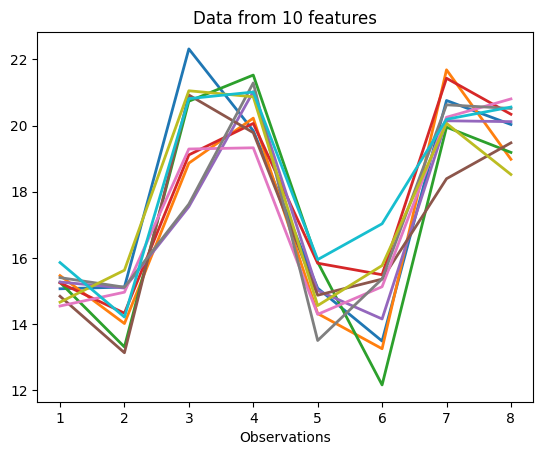

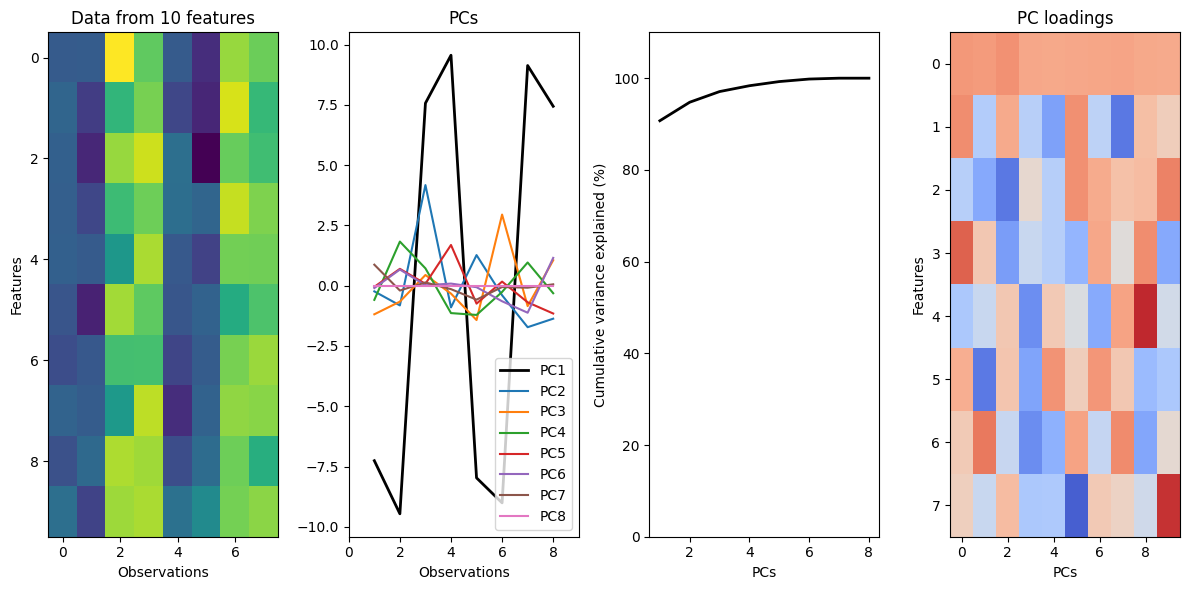

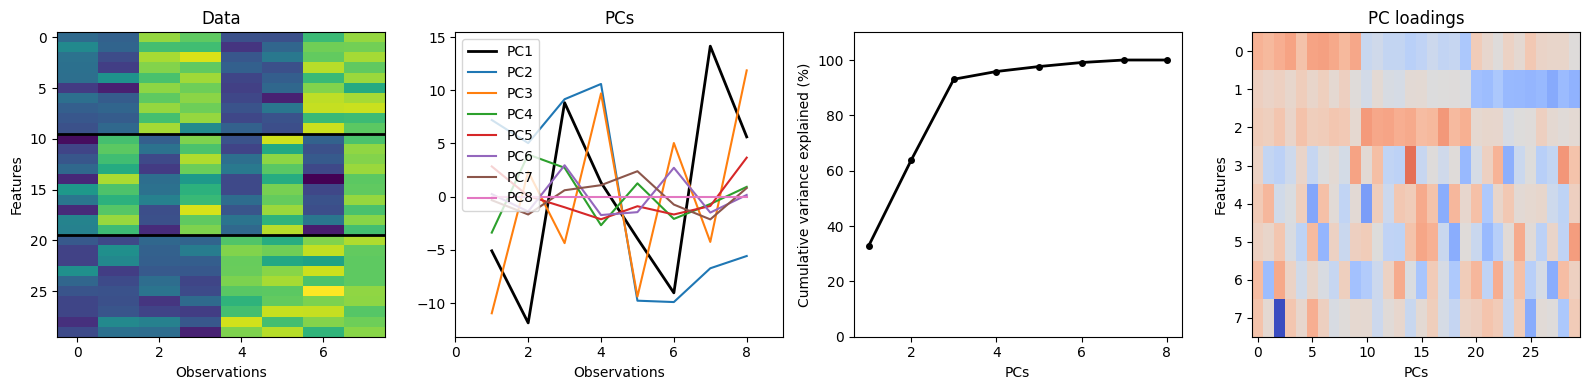

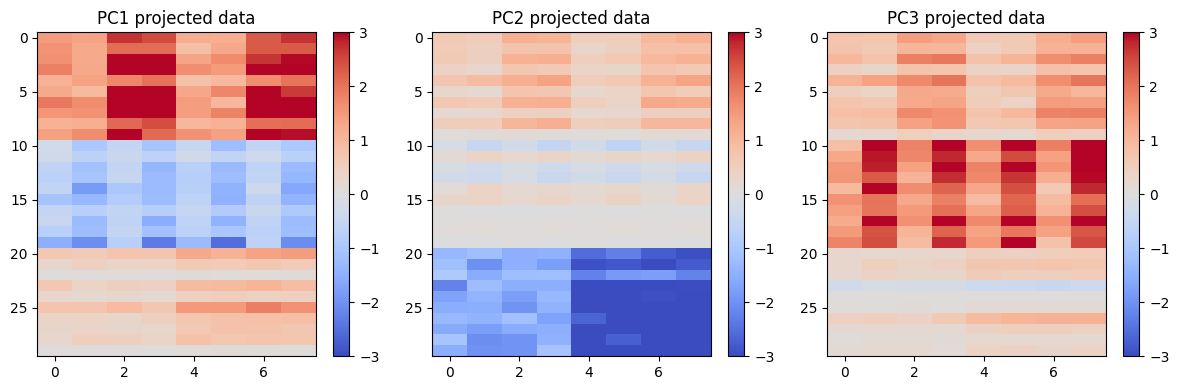

In [2]:
# Demo Script - Data mining
# -----------------------------------------------
# (1) Builds data with different underlying patterns
# (2) Runs PCA and visualizes results
# -----------------------------------------------
# if you do not have the required packages, install them via pip:
# pip install numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a pattern of responses observed to 8 different conditions
pattern1 = np.array([5, 5, 10, 10, 5, 5, 10, 10])
var = 1

# Generate a population of 10 features following the pattern with noise
pop1 = []
for k in range(10):
    noise = np.random.normal(0, var, size=8)
    pop1.append(pattern1 + noise + 10)
pop1 = np.array(pop1)

# Plot the features
plt.figure()
for feature in pop1:
    plt.plot(range(1, 9), feature, linewidth=2)
plt.xlabel('Observations')
plt.title('Data from 10 features')
plt.show()

# Heatmap of the features
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(pop1, aspect='auto', cmap='viridis')
plt.ylabel('Features')
plt.xlabel('Observations')
plt.title('Data from 10 features')

# Perform PCA
pca = PCA()
pcs = pca.fit_transform(pop1.T)
explained = pca.explained_variance_ratio_ * 100

# Plot the PCs
plt.subplot(1, 4, 2)
plt.plot(range(1, 9), pcs[:, 0], color='black', linewidth=2, label='PC1')
for k in range(1, pcs.shape[1]):
    plt.plot(range(1, 9), pcs[:, k], label=f'PC{k+1}')
plt.title('PCs')
plt.xlabel('Observations')
plt.legend()
plt.xlim([0, 9])

# Cumulative variance explained
plt.subplot(1, 4, 3)
plt.plot(range(1, len(explained) + 1), np.cumsum(explained), color='black', linewidth=2)
plt.ylabel('Cumulative variance explained (%)')
plt.xlabel('PCs')
plt.ylim([0, 110])

# PC loadings (coefficients)
plt.subplot(1, 4, 4)
plt.imshow(pca.components_, aspect='auto', cmap='coolwarm', vmin=-0.7, vmax=0.7)
plt.title('PC loadings')
plt.xlabel('PCs')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

###########################################
# Create more complex data and do a PCA 
# Create 3 populations that follow different patterns
###########################################

nb_features = 10
patterns = np.array([
    [5, 5, 10, 10, 5, 5, 10, 10],
    [5, 10, 5, 10, 5, 10, 5, 10],
    [5, 5, 5, 5, 10, 10, 10, 10]
])

# Repeat each pattern nb_features times to create the population
pop = np.repeat(patterns, nb_features, axis=0)
noise = np.random.normal(0, 1, size=pop.shape)
pop = pop + noise

# Visualize the data
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(pop, aspect='auto', cmap='viridis')
plt.axhline(y=nb_features-0.5, color='k', linewidth=2)
plt.axhline(y=2*nb_features-0.5, color='k', linewidth=2)
plt.ylabel('Features')
plt.xlabel('Observations')
plt.title('Data')

# Perform PCA
pca2 = PCA()
pcs2 = pca2.fit_transform(pop.T)
explained2 = pca2.explained_variance_ratio_ * 100

# Plot the PCs
plt.subplot(1, 4, 2)
plt.plot(range(1, pop.shape[1]+1), pcs2[:, 0], color='black', linewidth=2, label='PC1')
for k in range(1, pcs2.shape[1]):
    plt.plot(range(1, pop.shape[1]+1), pcs2[:, k], label=f'PC{k+1}')
plt.title('PCs')
plt.xlabel('Observations')
plt.xlim([0, pop.shape[1]+1])
plt.legend()

# Cumulative variance explained
plt.subplot(1, 4, 3)
plt.plot(range(1, len(explained2)+1), np.cumsum(explained2), '.-', markersize=8, color='black', linewidth=2)
plt.ylabel('Cumulative variance explained (%)')
plt.xlabel('PCs')
plt.ylim([0, 110])

# PC loadings (coefficients)
plt.subplot(1, 4, 4)
plt.imshow(pca2.components_, aspect='auto', cmap='coolwarm', vmin=-0.7, vmax=0.7)
plt.title('PC loadings')
plt.xlabel('PCs')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

###########################################
# PROJECT DATA ONTO PC!
###########################################

# Project the data onto PC1
coeff = pca2.components_.T  # shape: (features, PCs)
pc1proj = pop * coeff[:, 0][:, np.newaxis]

# Visualize projections
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(pc1proj, aspect='auto', vmin=-3, vmax=3, cmap='coolwarm')
plt.colorbar()
plt.title('PC1 projected data')

# Project onto PC2 and PC3
pc2proj = pop * coeff[:, 1][:, np.newaxis]
pc3proj = pop * coeff[:, 2][:, np.newaxis]

plt.subplot(1, 3, 2)
plt.imshow(pc2proj, aspect='auto', vmin=-3, vmax=3, cmap='coolwarm')
plt.colorbar()
plt.title('PC2 projected data')

plt.subplot(1, 3, 3)
plt.imshow(pc3proj, aspect='auto', vmin=-3, vmax=3, cmap='coolwarm')
plt.colorbar()
plt.title('PC3 projected data')

plt.tight_layout()
plt.show()






